## 4. Models for Stationary Time Series

**Exercise 4.1**.  Use first principles to find the autocorrelation function for the stationary process defined by

$$ Y_t = 5 + e_t - \frac{1}{2} e_{t - 1} + \frac{1}{4} e_{t - 2} $$

**Solution**. 

The variance is

$$ \gamma_0 
= \text{Var}[Y_t] 
= \text{Var}\left[ 5 + e_t - \frac{1}{2} e_{t - 1} + \frac{1}{4} e_{t - 2} \right]
= \text{Var}[e_t] + \frac{1}{4} \text{Var}[e_{t - 1}] + \frac{1}{16} \text{Var}[e_{t-2}] 
= \frac{21}{16} \sigma_e^2
$$

and the autocovariance is

$$ \gamma_k =
\text{Cov}[Y_t, Y_{t - k}] = \text{Cov}\left[ e_t - \frac{1}{2} e_{t - 1} + \frac{1}{4} e_{t - 2}, e_{t - k} - \frac{1}{2} e_{t - k - 1} + \frac{1}{4} e_{t - k - 2}\right]
$$

For $k = 1$,

$$ \gamma_1 = -\frac{1}{2} \text{Var}[e_{t - 1}] -\frac{1}{8} \text{Var}[e_{t - 2}] = -\frac{5}{8} \sigma_e^2 $$

For $k = 2$,

$$ \gamma_2 = \frac{1}{4} \text{Var}[e_{t - 2}] = \frac{1}{4} \sigma_e^2 $$

and the autocovariance is 0 for $k > 2$.

Therefore

$$ \gamma_k = \begin{cases}
(21 / 16) \sigma_e^2 &\text{for } k = 0 \\
-(5 / 8) \sigma_e^2 &\text{for } k = 1 \\
(1 / 4) \sigma_e^2 &\text{for } k = 2 \\
0 &\text{for } k > 2
\end{cases} $$

and the autocorrelation is

$$ \rho_k = \frac{\gamma_k}{\gamma_0} = \begin{cases}
1 &\text{for } k = 0 \\
-10 / 21 &\text{for } k = 1 \\
4 / 21 &\text{for } k = 2\\
0 &\text{for } k > 3
\end{cases} $$

**Exercise 4.2**.  Sketch the autocorrelation functions for the following MA(2) models with parameters as specified:

**(a)** $\theta_1 = 0.5$ and $\theta_2 = 0.4$.

**(b)** $\theta_1 = 1.2$ and $\theta_2 = -0.7$.

**(c)** $\theta_1 = -1$ and $\theta_2 = -0.6$.

**Solution**.

In [1]:
require(ggplot2)
require(latex2exp)

Loading required package: ggplot2

Loading required package: latex2exp



In [2]:
ma2_rho <- function(theta_1, theta_2) {
    function(k) {
        if (k == 0) { 
            1
        } else if (k == 1) {
            (-theta_1 + theta_1 * theta_2) / (1 + theta_1**2 + theta_2**2)
        } else if (k == 2) {
            -theta_2 / (1 + theta_1**2 + theta_2**2)
        } else {
            0
        }
    }
}

plot_ma2_acf <- function(theta_1, theta_2) {
    max_k = 12
    f = ma2_rho(theta_1, theta_2)
    k = seq(1, max_k)
    rho = sapply(k, f)
    
    options(repr.plot.width=12, repr.plot.height=4)
    p = ggplot() +
        geom_point(aes(x=k, y=rho), color='blue')
    for (i in 1:max_k) {
        p = p + geom_line(aes_string(x=k[i], y=c(0, rho[i])), color='blue')
    }
    p + geom_line(aes(x=k, y=0), color='blue', linetype='dashed') +
        xlab('Lag') + ylab(TeX('$\\rho_k$')) +
        theme_bw() + theme(text = element_text(size=16))
}

**(a)**

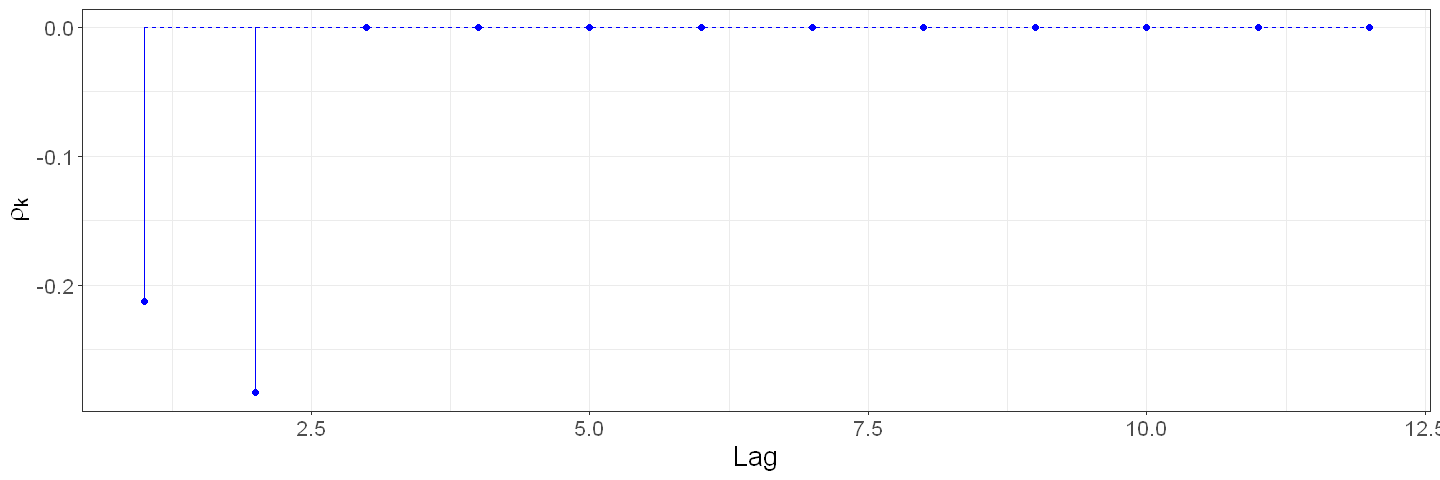

In [3]:
plot_ma2_acf(0.5, 0.4)

**(b)**

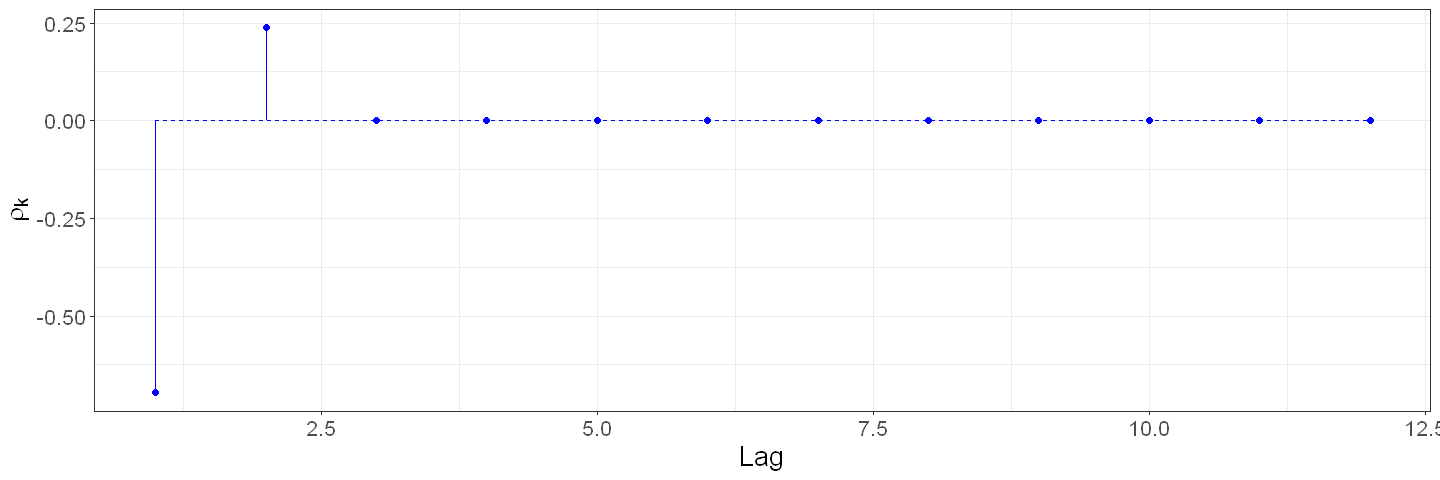

In [4]:
plot_ma2_acf(1.2, -0.7)

**(c)**

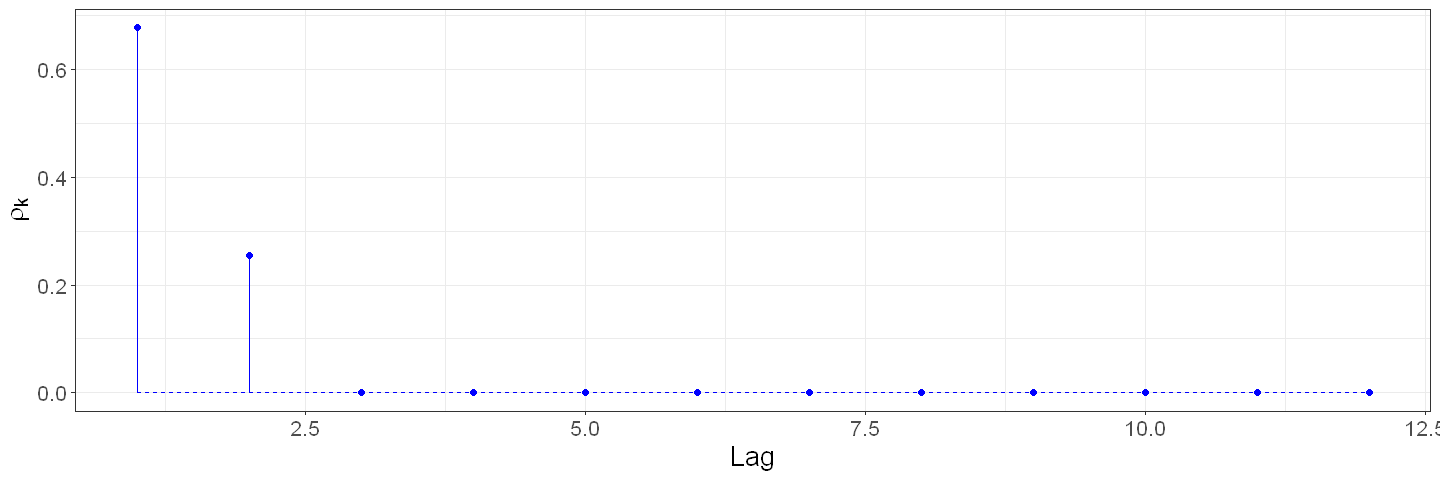

In [5]:
plot_ma2_acf(-1, -0.6)

**Exercise 4.3**.  Verify that for an MA(1) process

$$ \max_{-\infty < \theta < \infty} \rho_1 = 0.5 
\quad \text{and} \quad
\min_{-\infty < \theta < \infty} \rho_1 = -0.5 $$

**Solution**.  For a MA(1) process,

$$ \rho_1(\theta) = \frac{-\theta}{1 + \theta^2} $$

The derivative of this function is 

$$ \frac{d \rho_1(\theta)}{d\theta} = \frac{\theta^2 - 1}{(1 + \theta^2)^2} $$

which is only equal to zero on $\theta^2 = 1$, or $\theta = \pm 1$.  Therefore all global minimum and maximum values of $\rho_1$ are within $\theta \in \{-1, 1\}$.  It's easy to verify that $\rho_1(\theta_1 = -1) = 0.5$ and $\rho_1(\theta_1 = 1) = -0.5$, and so the result follows.

**Exercise 4.4**.  Show that when $\theta$ is replaced by $1 / \theta$, the autocorrelation function for an MA(1) process does not change.

**Solution**.  For a MA(1) process,

$$ \rho_1(\theta) = \frac{-\theta}{1 + \theta^2} $$

Therefore,

$$ \rho_1\left(\frac{1}{\theta}\right) = \frac{-\frac{1}{\theta}}{1 + \left(\frac{1}{\theta}\right)^2} =  \frac{-\theta}{1 + \theta^2} = \rho_1(\theta) $$